import necesarry libraries

In [1]:

import cv2
import os
import numpy as np
from glob import glob
import tensorflow as tf
from sklearn.model_selection import train_test_split
import natsort

import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img


load four corner cordinates csv file and image and mask

In [31]:
images_path = "/python_programming/phd/billboard_edgedetect/dataset/mask/"

fourcorner_csv_file = '/python_programming/phd/billboard_edgedetect/dataset/gt_4cornercordinates.csv'

dataset_images = []
dataset_image_name = []
dataset_cornercrd = []

img_height = 128
img_width = 128
image_size = 128
num_channels = 3 # RGB
INPUT_SHAPE = (img_height, img_width, num_channels)

In [32]:
image_records = pd.read_csv(fourcorner_csv_file)
w = 128
h = 128

for index, row in image_records.iterrows():

    (image_name, left_top_x1, left_top_y1,right_top_x2, right_top_y2, left_bottom_x3, left_bottom_y3, right_bottom_x4, right_bottom_y4) = row

    #print(row)

    dataset_image_name.append(image_name)

    #scale the bounding box coordinates relative to the spatialdimensions of the input image
    left_top_x1 = float(left_top_x1) / w
    left_top_y1 = float(left_top_y1) / h
    right_top_x2 = float(right_top_x2) / w
    right_top_y2 = float(right_top_y2) / h
    left_bottom_x3 = float(left_bottom_x3) / w
    left_bottom_y3 = float(left_bottom_y3) / h
    right_bottom_x4 = float(right_bottom_x4) / w
    right_bottom_y4 = float(right_bottom_y4) / h

    #dataset_cornercrd.append((left_top_x1, left_top_y1,  right_bottom_x4, right_bottom_y4))

    dataset_cornercrd.append((left_top_x1, left_top_y1, right_top_x2, right_top_y2, left_bottom_x3, left_bottom_y3, right_bottom_x4, right_bottom_y4))


    bill_image_fullpath = os.path.join(images_path, image_name)


    if (image_name.split('.')[1] == 'jpg'):
        #image = cv2.imread(bill_image_fullpath, cv2.IMREAD_GRAYSCALE)
        #image = cv2.resize(image, (128, 128))
        #image = np.expand_dims(image, axis=-1)
        #image = image/255.0
        image = load_img(bill_image_fullpath,  target_size=(128, 128)) #color_mode='grayscale',
        image = img_to_array(image)
        #image = np.expand_dims(image, axis=0)
        #image = np.squeeze(image, axis=1)
        dataset_images.append(np.array(image))
        #dataset_classname.append(1)



    #print(bill_image_fullpath)
    #print(row)


    #print('dataset_image_name:', dataset_image_name)
    #print('dataset_cornercrd:', dataset_cornercrd)
    #print('dataset_images:', dataset_images)
    #print('dataset_masks:', dataset_masks)

dataset_images = np.array(dataset_images)

dataset_image_name = np.array(dataset_image_name)
dataset_cornercrd = np.array(dataset_cornercrd)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image shape: (813, 128, 128, 3)
cordinates shape: (813, 8)
image name: (813,)
coordinates for this image is:  [0.6953125 0.375     0.9375    0.375     0.6953125 0.578125  0.9375
 0.578125 ] | imagename: scene_2356.jpg
coordinates for this image is:  0.6953125
x1_pixel: 89 | y1_pixel: 48 | x2_pixel: 120 | y2_pixel: 48 | x3_pixel: 89 | y3_pixel: 74 | x4_pixel: 120 | y4_pixel: 74


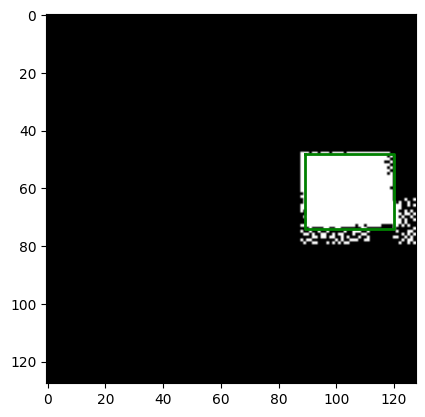

In [33]:
#random plot

print('image shape:', dataset_images.shape)
print('cordinates shape:', dataset_cornercrd.shape)
print('image name:', dataset_image_name.shape)
#print('class name:', dataset_classname.shape)

#Sanity check, view random few mages
import random
import numpy as np
image_number = random.randint(0, len(dataset_images)-1)
plt.imshow(np.reshape(dataset_images[image_number], (128, 128, 3)))
print("coordinates for this image is: ", dataset_cornercrd[image_number], '|', 'imagename:', dataset_image_name[image_number])
print("coordinates for this image is: ", dataset_cornercrd[image_number][0])
#print("classname of  image is: ", dataset_classname[image_number])

#print(dataset_images[image_number])

image_width = 128
image_height =  128

lefttop_x1  = int(dataset_cornercrd[image_number][0] * image_width)
lefttop_y1 = int(dataset_cornercrd[image_number][1] * image_height)
righttop_x2 =  int(dataset_cornercrd[image_number][2] * image_width)
righttop_y2 = int(dataset_cornercrd[image_number][3]  * image_height)
leftbottom_x3 = int(dataset_cornercrd[image_number][4]  * image_width)
leftbottom_y3 = int(dataset_cornercrd[image_number][5]  * image_height)
rightbottom_x4 = int(dataset_cornercrd[image_number][6] * image_width)
rightbottom_y4 = int(dataset_cornercrd[image_number][7] * image_height)


print('x1_pixel:', lefttop_x1, '|','y1_pixel:', lefttop_y1, '|', 'x2_pixel:', righttop_x2, '|', 'y2_pixel:', righttop_y2, '|', 'x3_pixel:', leftbottom_x3, '|', 'y3_pixel:', leftbottom_y3, '|', 'x4_pixel:', rightbottom_x4, '|', 'y4_pixel:', rightbottom_y4)

plt.plot([lefttop_x1, righttop_x2, rightbottom_x4, leftbottom_x3,  lefttop_x1], [lefttop_y1, righttop_y2, rightbottom_y4, leftbottom_y3, lefttop_y1], color='green', linewidth=2)
plt.show()


train test split

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, X_test,  Z_train, Z_test = train_test_split(dataset_images, dataset_cornercrd,  test_size = 0.20, random_state = 0)
#y_train, y_test, dataset_classname
#X_trainname, X_testname = train_test_split(dataset_images, test_size = 0.20, random_state = 0)

X_train = X_train / 255.
X_test = X_test / 255.

#Z_train = Z_train / 255.
#Z_test = Z_test / 255.

print(f"x_train shape: {X_train.shape}")#
print(f"x_test shape: {X_test.shape}")#
#print(f"y_train shape: {y_train.shape}, y_testshape: {y_test.shape}")
print(f"z_train shape: {len(Z_train)} - z_test; shape: {len(Z_test)}")
print(f"z_train shape: {Z_train.shape} - z_test; shape: {Z_test.shape}")

#print('X_trainname:', X_trainname) #print(X_testname[int(80 * 0.2):])
#print('X_testname:', X_testname) #print(X_testname[int(80 * 0.2):])


x_train shape: (650, 128, 128, 3)
x_test shape: (163, 128, 128, 3)
z_train shape: 650 - z_test; shape: 163
z_train shape: (650, 8) - z_test; shape: (163, 8)


edgenet with adsegnet

In [35]:
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, Flatten, Dense
from tensorflow.keras.layers import UpSampling2D, Input, Concatenate, MaxPool2D, Rescaling
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Reshape, multiply, Activation, Dropout
from tensorflow.keras.models import load_model

#create the common input layer
input_shape = (128, 128, 3)
input_layer = Input(input_shape)# tf.keras.layers.Input(input_shape)


def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)

# Load the pre-trained model
model_path = '/python_programming/phd/billboard_edgedetect/segmentation_model/billboard_adsegnet_ver1.hdf5'
pretrained_model = load_model(model_path, custom_objects={'iou': iou})

# Freeze all layers in the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

base_layers = base_layers = pretrained_model(input_layer)

encoder = Conv2D(64, (3, 3), activation='relu', padding='same')(base_layers)
encoder = MaxPool2D((2, 2), padding='same')(encoder)
encoder = Conv2D(32, (3, 3), activation='relu', padding='same')(encoder)
encoder = MaxPool2D((2, 2), padding='same')(encoder)

x = Flatten(name='bl_f')(encoder)

corner_points_branch = Dense(1024, activation='relu', name='cp_0')(x)
corner_points_branch = Dropout(0.5, name='dropout2')(corner_points_branch)
#corner_points_branch = Dense(256, activation='relu', name='cp_1')(corner_points_branch)

#corner_points_branch = Dense(512, activation='relu', name='cp_2')(corner_points_branch)
#corner_points_branch = Dropout(0.5, name='dropout3')(corner_points_branch)
#corner_points_branch = Dense(64, activation='relu', name='cp_3')(corner_points_branch)
#corner_points_branch = Dense(32, activation='relu', name='cp_4')(corner_points_branch)
#corner_points_branch = Dense(16, activation='relu', name='cp_5')(corner_points_branch)
#### four corner model ####
corner_points_branch = Dense(8, activation='sigmoid', name='cp_head')(corner_points_branch) #sigmoid #softmax

fourcorner_pretrainedadseg_edgenet = tf.keras.Model(input_layer,
           outputs=[corner_points_branch])#,classifier_branch,

fourcorner_pretrainedadseg_edgenet.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 128, 128, 1)       34166     
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                       

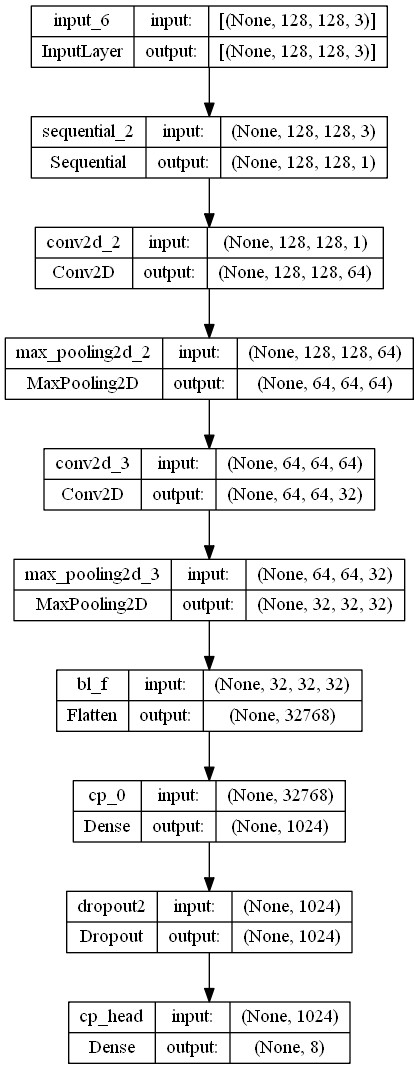

In [36]:
tf.keras.utils.plot_model(fourcorner_pretrainedadseg_edgenet, show_shapes=True)

define custom loss

In [37]:

from keras import backend as K

def custom_loss(y_true, y_pred):
    # Separate true and predicted coordinates
    true_x1 = y_true[:, 0:1]
    true_y1 = y_true[:, 1:2]
    true_x2 = y_true[:, 2:3]
    true_y2 = y_true[:, 3:4]
    true_x3 = y_true[:, 4:5]
    true_y3 = y_true[:, 5:6]
    true_x4 = y_true[:, 6:7]
    true_y4 = y_true[:, 7:8]

    pred_x1 = y_pred[:, 0:1]
    pred_y1 = y_pred[:, 1:2]
    pred_x2 = y_pred[:, 2:3]
    pred_y2 = y_pred[:, 3:4]
    pred_x3 = y_pred[:, 4:5]
    pred_y3 = y_pred[:, 5:6]
    pred_x4 = y_pred[:, 6:7]
    pred_y4 = y_pred[:, 7:8]
    #true_x1, true_y1, true_x2, true_y2, true_x3, true_y3, true_x4, true_y4 = K.split(y_true, 8)
    #pred_x1, pred_y1, pred_x2, pred_y2, pred_x3, pred_y3, pred_x4, pred_y4 = K.split(y_pred, 8)

    # Calculate custom loss for each coordinate
    loss_x1 = K.mean(K.square(pred_x1 - true_x1))
    loss_y1 = K.mean(K.square(pred_y1 - true_y1))
    #x2,y2
    loss_x2 = K.mean(K.square(pred_x2 - true_x2))
    loss_y2 = K.mean(K.square(pred_y2 - true_y2))
    #x3,y3
    loss_x3 = K.mean(K.square(pred_x3 - true_x3))
    loss_y3 = K.mean(K.square(pred_y3 - true_y3))
    #x4,y4
    loss_x4 = K.mean(K.square(pred_x4 - true_x4))
    loss_y4 = K.mean(K.square(pred_y4 - true_y4))


    # Sum up individual losses with potentially different weights
    loss_corordinates = loss_x1 + loss_y1 + loss_x2 + loss_y2 + loss_x3 + loss_y3 +  loss_x4 + loss_y4

    #loss = tf.keras.losses.Huber(y_true, y_pred, delta=1.0, reduction=tf.losses.Reduction.SUM)
    #tf.keras.losses.Huber(delta=1.0)
    total_loss = loss_corordinates #+ loss

    return total_loss



Train the  model

In [39]:
#train

import os
import numpy as np
import tensorflow as tf

from tensorflow.keras.callbacks import (
        EarlyStopping,
        ModelCheckpoint,
        ReduceLROnPlateau,
        CSVLogger,
        TensorBoard
)
from tensorflow.keras.metrics import Recall, Precision

def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)


losses = tf.keras.losses.MSE

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
metrics = ["acc", 'mse', iou, 'mae']

# Compile your model using the custom loss function#custom_loss
fourcorner_pretrainedadseg_edgenet.compile(loss=custom_loss, optimizer=opt, metrics=metrics)

callbacks = [
        ModelCheckpoint("/python_programming/phd/billboard_edgedetect/Model/adsegnet/fourcorner_pretrainedadseg_edgenet_sigmoid.h5"), #saves best model according to val_loss
        ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3),
        CSVLogger("/python_programming/phd/billboard_edgedetect/Model/adsegnet/csv_data/fourcorner_pretrainedadseg_edgenet_sigmoid.csv"),#epoch results to a csv file
        TensorBoard(),
        EarlyStopping(
            monitor="val_loss",
            patience=10,
            restore_best_weights=False
        )
    ]

customised loss function
loss_coordinates = loss_x1 + loss_y1 + loss_x2 + loss_y2 + loss_x3 + loss_y3 +  loss_x4 + loss_y4
loss = huber_loss
total_loss = loss_coordinates + loss

In [40]:
model_history= fourcorner_pretrainedadseg_edgenet.fit(X_train, Z_train,
        validation_data=(X_test, Z_test),
        epochs=100,
        batch_size= 32,
        callbacks=callbacks
    )

Epoch 1/100
21/21 [==============================] - 23s 192ms/step - loss: 0.2923 - acc: 0.4123 - mse: 0.0365 - iou: 0.3823 - mae: 0.1505 - val_loss: 0.1295 - val_acc: 0.0736 - val_mse: 0.0162 - val_iou: 0.4296 - val_mae: 0.0924 - lr: 1.0000e-04
Epoch 2/100
21/21 [==============================] - 3s 129ms/step - loss: 0.1358 - acc: 0.3785 - mse: 0.0170 - iou: 0.4227 - mae: 0.0960 - val_loss: 0.0903 - val_acc: 0.5521 - val_mse: 0.0113 - val_iou: 0.4443 - val_mae: 0.0788 - lr: 1.0000e-04
Epoch 3/100
21/21 [==============================] - 3s 135ms/step - loss: 0.1070 - acc: 0.4200 - mse: 0.0134 - iou: 0.4381 - mae: 0.0854 - val_loss: 0.0734 - val_acc: 0.3497 - val_mse: 0.0092 - val_iou: 0.4449 - val_mae: 0.0692 - lr: 1.0000e-04
Epoch 4/100
21/21 [==============================] - 2s 117ms/step - loss: 0.0889 - acc: 0.4985 - mse: 0.0111 - iou: 0.4423 - mae: 0.0764 - val_loss: 0.0610 - val_acc: 0.3190 - val_mse: 0.0076 - val_iou: 0.4432 - val_mae: 0.0622 - lr: 1.0000e-04
Epoch 5/100
21/

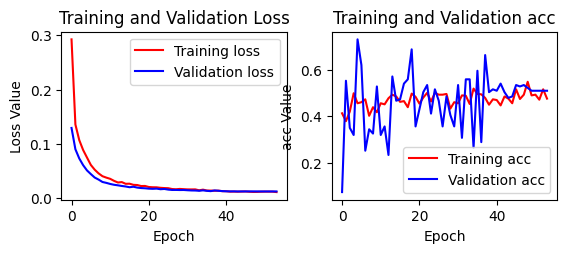

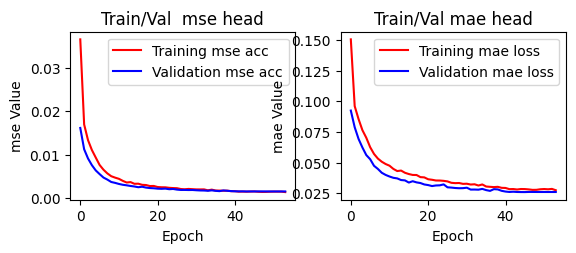

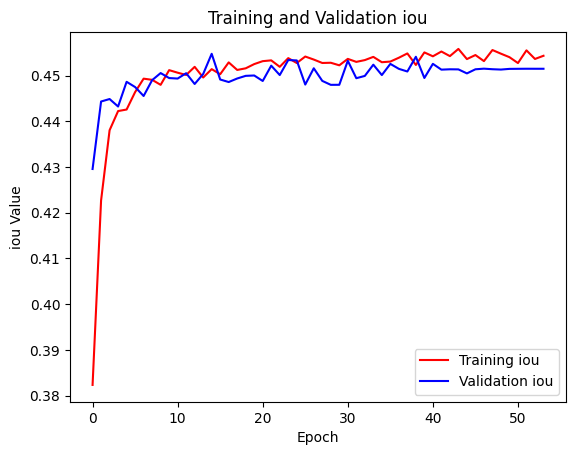

In [41]:
import matplotlib.pyplot as plt

epoch = range(54)
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

acc = model_history.history['acc']
val_acc = model_history.history['val_acc']


plt.figure()
plt.subplot(2,2,1)
plt.plot(epoch, loss, 'r', label='Training loss')
plt.plot(epoch, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epoch, acc, 'r', label='Training acc')
plt.plot(epoch, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epoch')
plt.ylabel('acc Value')
plt.legend()


mse = model_history.history['mse']
val_mse  = model_history.history['val_mse']
mae  = model_history.history['mae']
val_mae  = model_history.history['val_mae']

plt.figure()
plt.subplot(2,2,1)
plt.plot(epoch, mse, 'r', label='Training mse acc')
plt.plot(epoch, val_mse, 'b', label='Validation mse acc')
plt.title('Train/Val  mse head')
plt.xlabel('Epoch')
plt.ylabel('mse Value')
plt.legend()


plt.subplot(2,2,2)
plt.plot(epoch, mae, 'r', label='Training mae loss')
plt.plot(epoch, val_mae, 'b', label='Validation mae loss')
plt.title('Train/Val mae head')
plt.xlabel('Epoch')
plt.ylabel('mae Value')
plt.legend()
plt.show()

iou = model_history.history['iou']
val_iou  = model_history.history['val_iou']

plt.figure()
plt.plot(epoch, iou, 'r', label='Training iou')
plt.plot(epoch, val_iou, 'b', label='Validation iou')
plt.title('Training and Validation iou')
plt.xlabel('Epoch')
plt.ylabel('iou Value')
plt.legend()
plt.show()

save model

In [42]:
fourcorner_pretrainedadseg_edgenet.save('/python_programming/phd/billboard_edgedetect/Model/adsegnet/fourcorner_pretrainedadseg_edgenet_sigmoid.hdf5')

1/1 [==============================] - 1s 755ms/step
x1: 0.051176097 | y1: 0.24748695 | x2: 0.9629126 | y2: 0.24330653 | x3: 0.053160187 | y3: 0.6388794 | x4: 0.96093655 | y4: 0.6342022
x1_pixel: 6 | y1_pixel: 31 | x2_pixel: 123 | y2_pixel: 31 | x3_pixel: 6 | y3_pixel: 81 | x4_pixel: 122 | y4_pixel: 81


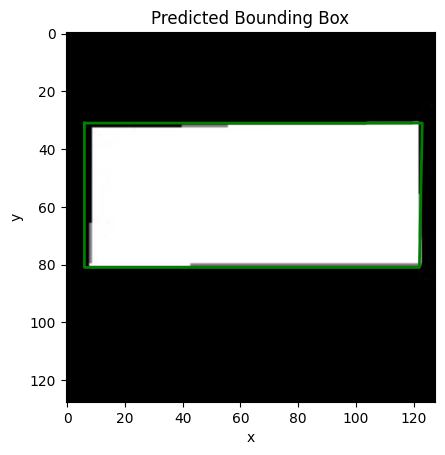

In [48]:
import numpy as np

test_image_path = "/python_programming/phd/billboard_edgedetect/dataset/mask/scene_12.jpg"

'''
test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
#test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(test_image, (128, 128))
test_image = test_image/255.0
test_image = np.array(test_image)
test_image = np.expand_dims(test_image, axis=0)
'''

test_image = load_img(test_image_path,  target_size=(128, 128)) #color_mode='grayscale',
test_image = img_to_array(test_image) / 255.0
test_image = np.expand_dims(test_image, axis= 0)

#Make the prediction using your trained model

bbox_predictions = fourcorner_pretrainedadseg_edgenet.predict(test_image)[0]


# Assuming the bounding box coordinates are in the format (x1, y1, x2, y2, x3, y3, x4, y4 )
x1, y1, x2, y2, x3, y3, x4, y4 = bbox_predictions#[0]

print('x1:', x1, '|','y1:', y1, '|', 'x2:', x2, '|', 'y2:', y2, '|', 'x3:', x3, '|', 'y3:', y3, '|', 'x4:', x4, '|', 'y4:', y4)


#convert the normalized coordinates to pixel coordinates
image_width = 128
image_height =  128

x1_pixel = int(x1 * image_width)
y1_pixel = int(y1 * image_height)
x2_pixel = int(x2 * image_width)
y2_pixel = int(y2 * image_height)
x3_pixel = int(x3 * image_width)
y3_pixel = int(y3 * image_height)
x4_pixel = int(x4 * image_width)
y4_pixel = int(y4 * image_height)

print('x1_pixel:', x1_pixel, '|','y1_pixel:', y1_pixel, '|', 'x2_pixel:', x2_pixel, '|', 'y2_pixel:', y2_pixel, '|', 'x3_pixel:', x3_pixel, '|', 'y3_pixel:', y3_pixel, '|', 'x4_pixel:', x4_pixel, '|', 'y4_pixel:', y4_pixel)

plt.imshow(test_image[0])
plt.title('Predicted Bounding Box')
plt.xlabel('x')
plt.ylabel('y')

# Draw the bounding box on the image
plt.plot([x1_pixel, x2_pixel, x4_pixel, x3_pixel, x1_pixel], [y1_pixel, y2_pixel, y4_pixel, y3_pixel, y1_pixel], color='green', linewidth=2)

# Show the plot
plt.show()



In [50]:
import csv

folder_path = "/python_programming/phd/billboard_edgedetect/dataset/masktest/"

header = ['filename', 'x1_pixel', 'y1_pixel', 'x2_pixel', 'y2_pixel', 'x3_pixel', 'y3_pixel', 'x4_pixel', 'y4_pixel']

with open('/python_programming/phd/billboard_edgedetect/results/adseg_edgnet/4corner_adsegedgnet.csv', 'w', newline ='') as file:
      writer = csv.writer(file)
      writer.writerow(header)

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):  # Assuming all images are in JPG format
        # Construct the full path to the image
        test_image_path = os.path.join(folder_path, filename)

        # Read and preprocess the image
        '''
        test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
        test_image = cv2.resize(test_image, (128, 128))
        test_image = test_image / 255.0
        test_image = np.expand_dims(test_image, axis=0)
        '''
        test_image = load_img(test_image_path,  target_size=(128, 128)) #color_mode='grayscale',
        test_image = img_to_array(test_image) / 255.0
        test_image = np.expand_dims(test_image, axis= 0)

        # Make predictions using the pre-trained model
        bbox_predictions = fourcorner_pretrainedadseg_edgenet.predict(test_image)

        # Convert normalized coordinates to pixel coordinates
        image_width, image_height = 128, 128
        x1_pixel = int(bbox_predictions[0][0] * image_width)
        y1_pixel = int(bbox_predictions[0][1] * image_height)
        x2_pixel = int(bbox_predictions[0][2] * image_width)
        y2_pixel = int(bbox_predictions[0][3] * image_height)
        x3_pixel = int(bbox_predictions[0][4] * image_width)
        y3_pixel = int(bbox_predictions[0][5] * image_height)
        x4_pixel = int(bbox_predictions[0][6] * image_width)
        y4_pixel = int(bbox_predictions[0][7] * image_height)

        print('filename:', filename, '|', 'x1_pixel:', x1_pixel, '|','y1_pixel:', y1_pixel, '|', 'x2_pixel:', x2_pixel, '|', 'y2_pixel:', y2_pixel, '|', 'x3_pixel:', x3_pixel, '|', 'y3_pixel:', y3_pixel, '|', 'x4_pixel:', x4_pixel, '|', 'y4_pixel:', y4_pixel)


        # Visualize the bounding box on the image
        plt.imshow(test_image[0])
        #plt.title('Predicted Bounding Box')
        #plt.xlabel('x')
        #plt.ylabel('y')
        plt.axis('off')

        plt.plot([x1_pixel, x2_pixel, x4_pixel, x3_pixel, x1_pixel],
                 [y1_pixel, y2_pixel, y4_pixel, y3_pixel, y1_pixel], color='green', linewidth=2)
        plt.savefig('/python_programming/phd/billboard_edgedetect/results/adseg_edgnet/4corner_adsegedgnet/' +filename+ '', bbox_inches = 'tight', pad_inches = 0)
        plt.show()


        with open('/python_programming/phd/billboard_edgedetect/results/adseg_edgnet/4corner_adsegedgnet.csv', 'a', newline ='') as file:
            writer = csv.writer(file)
            data = [filename, x1_pixel, y1_pixel, x2_pixel, y2_pixel, x3_pixel, y3_pixel, x4_pixel, y4_pixel  ]
            writer.writerow(data)

        #cv2.imwrite(f'/python_programming/phd/billboard_edgedetect/results/adseg_edgnet/{imagefilename}', testimage)

Output hidden; open in https://colab.research.google.com to view.

sanity check

x1_pixel: 40 | y1_pixel: 13 | x2_pixel: 105 | y2_pixel: 35 | x3_pixel: 32 | y3_pixel: 124 | x4_pixel: 114 | y4_pixel: 124


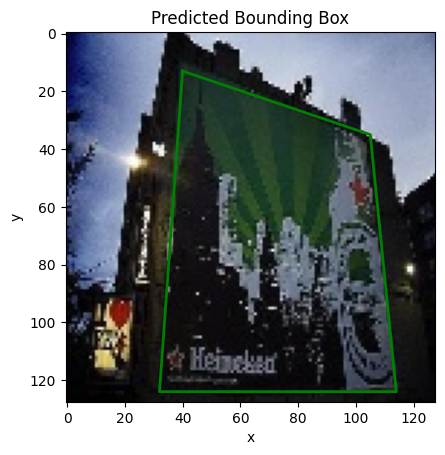

In [ ]:
# scaled coordinates for this image is:
#imagename: scene_1047.jpg  [0.015625  0.1328125 0.96875   0.1328125 0.015625  0.8984375 0.96875 0.8984375]
#imagename: scene_1450.jpg  [0.734375  0.46875   0.8359375 0.46875   0.734375  0.59375   0.8359375 0.59375]
#imagename: scene_430.jpg   [0.3125    0.1015625 0.8203125 0.2734375 0.25      0.96875   0.890625  0.96875]

x1 = 0.3125
y1 = 0.1015625

x2 = 0.8203125
y2 = 0.2734375

x3 = 0.25
y3 = 0.96875
x4 = 0.890625
y4 =  0.96875


#convert the normalized coordinates to pixel coordinates
image_width = 128
image_height =  128

x1_pixel = int(x1 * image_width)
y1_pixel = int(y1 * image_height)
x2_pixel = int(x2 * image_width)
y2_pixel = int(y2 * image_height)
x3_pixel = int(x3 * image_width)
y3_pixel = int(y3 * image_height)
x4_pixel = int(x4 * image_width)
y4_pixel = int(y4 * image_height)

print('x1_pixel:', x1_pixel, '|','y1_pixel:', y1_pixel, '|', 'x2_pixel:', x2_pixel, '|', 'y2_pixel:', y2_pixel, '|', 'x3_pixel:', x3_pixel, '|', 'y3_pixel:', y3_pixel, '|', 'x4_pixel:', x4_pixel, '|', 'y4_pixel:', y4_pixel)

test_image_path = "/python_programming/phd/billboard_edgedetect/dataset/Billboard/scene_430.jpg"

test_image = cv2.imread(test_image_path, cv2.IMREAD_COLOR)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
##test_image = cv2.resize(test_image, (128, 128))
#test_image = test_image/255.0
#test_image = np.array(test_image)
#test_image = np.expand_dims(test_image, axis=0)

plt.imshow(test_image)
plt.title('Predicted Bounding Box')
plt.xlabel('x')
plt.ylabel('y')

# Draw the bounding box on the image
#plt.plot([x1_pixel, x4_pixel, x4_pixel, x1_pixel, x1_pixel], [y1_pixel, y1_pixel, y4_pixel, y4_pixel, y1_pixel], color='green', linewidth=2)
plt.plot([x1_pixel, x2_pixel, x4_pixel, x3_pixel, x1_pixel], [y1_pixel, y2_pixel, y4_pixel, y3_pixel, y1_pixel], color='green', linewidth=2)

plt.show()